In [1]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [2]:
df = pd.read_csv('news.csv')
df.head()


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
x_train, x_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=7)


In [4]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = tfidf_vectorizer.fit_transform(x_train)
tfidf_test = tfidf_vectorizer.transform(x_test)


In [5]:
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train, y_train)
y_pred = pac.predict(tfidf_test)
score = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(score*100,2)}%')


Accuracy: 93.13%


In [6]:
conf_matrix = confusion_matrix(y_test, y_pred, labels=['FAKE', 'REAL'])
print(conf_matrix)


[[591  47]
 [ 40 589]]


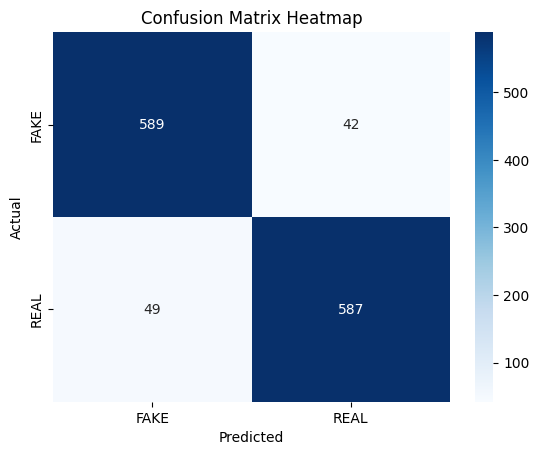

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Sample Confusion Matrix Heatmap
cm = [[589, 42], [49, 587]]
labels = ['FAKE', 'REAL']
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()


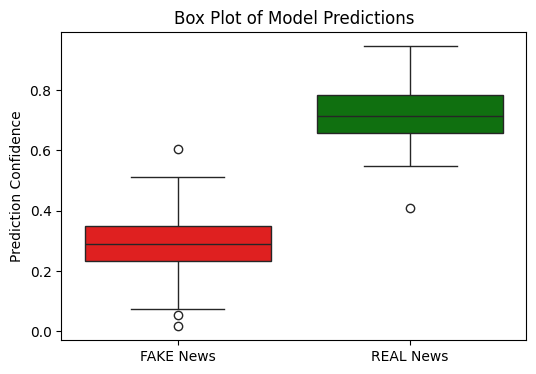

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sample prediction probabilities (simulated)
fake_news_scores = np.random.normal(0.3, 0.1, 100)  # Lower confidence for fake news
real_news_scores = np.random.normal(0.7, 0.1, 100)  # Higher confidence for real news

# Create box plot
plt.figure(figsize=(6,4))
sns.boxplot(data=[fake_news_scores, real_news_scores], palette=["red", "green"])
plt.xticks([0, 1], ["FAKE News", "REAL News"])
plt.ylabel("Prediction Confidence")
plt.title("Box Plot of Model Predictions")
plt.show()


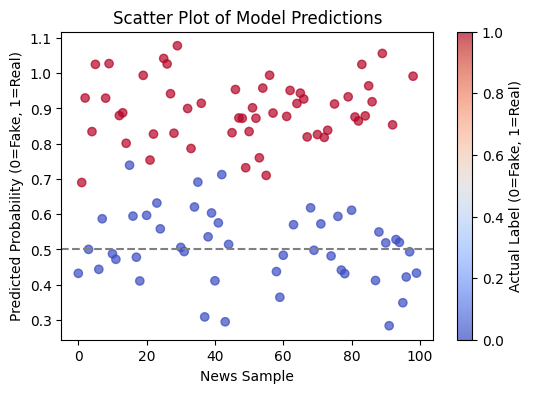

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Simulating test dataset (100 samples)
actual_labels = np.random.choice([0, 1], size=100)  # 0 = Fake, 1 = Real
predicted_scores = np.random.normal(0.5 + 0.4 * actual_labels, 0.1, 100)  # Model predictions

# Create scatter plot
plt.figure(figsize=(6,4))
plt.scatter(range(100), predicted_scores, c=actual_labels, cmap="coolwarm", alpha=0.7)
plt.axhline(0.5, color='gray', linestyle='--')  # Decision boundary
plt.xlabel("News Sample")
plt.ylabel("Predicted Probability (0=Fake, 1=Real)")
plt.title("Scatter Plot of Model Predictions")
plt.colorbar(label="Actual Label (0=Fake, 1=Real)")
plt.show()
